In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import plotly.express as px 

In [2]:
# For BD 
bd = pd.read_csv("./bd_data/COVID-19_in_bd.csv")
# Active Cases in BD 
bd['Active'] = bd['Confirmed'] - bd['Deaths'] - bd['Recovered']

In [3]:
# bd data 
bd.head() 

,Date,Confirmed,Deaths,Recovered,Active
0,2020-03-08,3,0,0,3
1,2020-03-09,3,0,0,3
2,2020-03-10,3,0,0,3
3,2020-03-11,3,0,0,3
4,2020-03-12,3,0,0,3


In [4]:
# Confirmed 
bd['Confirmed'].max() 

803

In [5]:
# Dethas 
bd['Deaths'].max() 

39

In [6]:
# Recovered 
bd['Recovered'].max()

42

In [7]:
# Active 
bd['Active'].max() 

722

In [22]:
bd = bd.sort_index()

In [26]:
bd

,Date,Confirmed,Deaths,Recovered,Active
0,2020-03-08,3,0,0,3
1,2020-03-09,3,0,0,3
2,2020-03-10,3,0,0,3
3,2020-03-11,3,0,0,3
4,2020-03-12,3,0,0,3
5,2020-03-13,3,0,0,3
6,2020-03-14,3,0,0,3
7,2020-03-15,5,0,0,5
8,2020-03-16,8,0,0,8
9,2020-03-17,10,0,0,10


In [29]:
apr = bd.loc[24:].reset_index(drop=True)

In [30]:
apr 

,Date,Confirmed,Deaths,Recovered,Active
0,2020-04-01,54,6,26,22
1,2020-04-02,56,6,26,24
2,2020-04-03,61,6,26,29
3,2020-04-04,70,8,30,32
4,2020-04-05,88,9,30,49
5,2020-04-06,123,12,33,78
6,2020-04-07,164,17,33,114
7,2020-04-08,218,20,33,165
8,2020-04-09,333,21,33,279
9,2020-04-10,424,27,33,364


In [33]:
# Grouping cases by date 
temp = apr.groupby('Date')['Confirmed', 'Recovered', 'Deaths', 'Active'].sum().reset_index() 
# Unpivoting 
temp = temp.melt(id_vars='Date',value_vars = ['Confirmed', 'Recovered', 'Deaths', 'Active'], var_name='Case', value_name='Count') 

# Visualization
fig = px.bar(temp, x='Date', y='Count', color='Case', template='ggplot2') 
fig.update_layout(title="COVID-19 Cases in Bangladesh(April)")
fig.show()

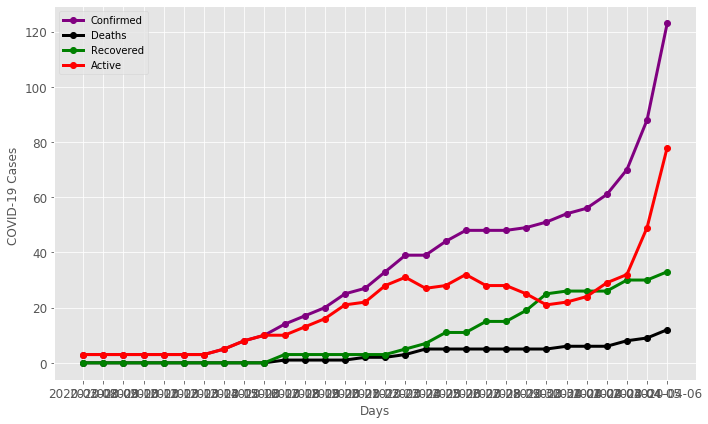

In [143]:
# Linear Scale for Total Confrmed Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax.plot(bd['Date'], bd['Confirmed'], marker='o', color='purple', linewidth=3, label='Confirmed')
ax.plot(bd['Date'], bd['Deaths'], marker='o', color='black', linewidth=3, label='Deaths')
ax.plot(bd['Date'], bd['Recovered'], marker='o', color='green', linewidth=3, label='Recovered')
ax.plot(bd['Date'], bd['Active'], marker='o', color='red', linewidth=3, label='Active')

# ax.xaxis.set_major_formatter(mdates.AutoDateFormatter('%b-%d'))
# ax.xaxis_date()

ax.set_yscale('linear')  
ax.set_xlabel('Days', fontsize=12)
ax.set_ylabel('COVID-19 Cases ', fontsize=12)  

plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

plt.tight_layout() 
plt.legend(loc="upper left")
plt.show()

In [76]:
# For World Data 
world_data = pd.read_csv("./world_data/covid-19_cleaned_data.csv(updated)")

In [77]:
world_data.head() 

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Thailand,Thailand,15.0000,101.0000,2020-01-22,2,0,0
1,Japan,Japan,36.0000,138.0000,2020-01-22,2,0,0
2,Singapore,Singapore,1.2833,103.8333,2020-01-22,0,0,0
3,Nepal,Nepal,28.1667,84.2500,2020-01-22,0,0,0
4,Malaysia,Malaysia,2.5000,112.5000,2020-01-22,0,0,0


In [120]:
# Italy 
italy = world_data[world_data['Country/Region'] == "Italy"].reset_index(drop=True) 
# Active Cases in Italy 
italy['Active'] = italy['Confirmed'] - italy['Deaths'] - italy['Recovered']

In [83]:
italy_30

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,Italy,Italy,43.0,12.0,2020-01-22,0,0,0,0
1,Italy,Italy,43.0,12.0,2020-01-23,0,0,0,0
2,Italy,Italy,43.0,12.0,2020-01-24,0,0,0,0
3,Italy,Italy,43.0,12.0,2020-01-25,0,0,0,0
4,Italy,Italy,43.0,12.0,2020-01-26,0,0,0,0
5,Italy,Italy,43.0,12.0,2020-01-27,0,0,0,0
6,Italy,Italy,43.0,12.0,2020-01-28,0,0,0,0
7,Italy,Italy,43.0,12.0,2020-01-29,0,0,0,0
8,Italy,Italy,43.0,12.0,2020-01-30,0,0,0,0
9,Italy,Italy,43.0,12.0,2020-01-31,2,0,0,2


In [84]:
# Confirmed in 30 days 
italy_30['Confirmed'].max() 

3

In [85]:
# Deaths in 30 days 
italy_30['Deaths'].max() 

0

In [86]:
# Recovered in 30 days 
italy_30['Recovered'].max() 

0

In [87]:
# Active in 30 days 
italy_30['Active'].max() 

3

In [88]:
# For US 
us = world_data[world_data['Country/Region'] == "US"].reset_index(drop=True) 
us['Active'] = us['Confirmed'] - us['Deaths'] - us['Recovered']

In [90]:
us.head() 

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,Washington,US,47.4009,-121.4905,2020-01-22,0,0,0,0
1,New York,US,42.1657,-74.9481,2020-01-22,0,0,0,0
2,California,US,36.1162,-119.6816,2020-01-22,0,0,0,0
3,Massachusetts,US,42.2302,-71.5301,2020-01-22,0,0,0,0
4,Diamond Princess,US,35.4437,139.6380,2020-01-22,0,0,0,0


In [91]:
us_30 = us.loc[:29]

In [92]:
us_30

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,Washington,US,47.4009,-121.4905,2020-01-22,0,0,0,0
1,New York,US,42.1657,-74.9481,2020-01-22,0,0,0,0
2,California,US,36.1162,-119.6816,2020-01-22,0,0,0,0
3,Massachusetts,US,42.2302,-71.5301,2020-01-22,0,0,0,0
4,Diamond Princess,US,35.4437,139.6380,2020-01-22,0,0,0,0
5,Grand Princess,US,37.6489,-122.6655,2020-01-22,0,0,0,0
6,Georgia,US,33.0406,-83.6431,2020-01-22,0,0,0,0
7,Colorado,US,39.0598,-105.3111,2020-01-22,0,0,0,0
8,Florida,US,27.7663,-81.6868,2020-01-22,0,0,0,0
9,New Jersey,US,40.2989,-74.5210,2020-01-22,0,0,0,0


In [98]:
# Confirmed in 30 days 
us_30['Confirmed'].max() 

0

In [99]:
# Deaths in 30 days 
us_30['Deaths'].max() 

0

In [100]:
# Recovered in 30 days 
us_30['Recovered'].max() 

0

In [101]:
# Active in 30 days 
us_30['Active'].max() 

0

In [63]:
# For Spain 
spain = world_data[world_data['Country/Region'] == "Spain"].reset_index(drop=True) 

In [64]:
spain_30 = spain.loc[:29]

In [65]:
spain_30

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Spain,Spain,40.0,-4.0,2020-01-22,0,0,0
1,Spain,Spain,40.0,-4.0,2020-01-23,0,0,0
2,Spain,Spain,40.0,-4.0,2020-01-24,0,0,0
3,Spain,Spain,40.0,-4.0,2020-01-25,0,0,0
4,Spain,Spain,40.0,-4.0,2020-01-26,0,0,0
5,Spain,Spain,40.0,-4.0,2020-01-27,0,0,0
6,Spain,Spain,40.0,-4.0,2020-01-28,0,0,0
7,Spain,Spain,40.0,-4.0,2020-01-29,0,0,0
8,Spain,Spain,40.0,-4.0,2020-01-30,0,0,0
9,Spain,Spain,40.0,-4.0,2020-01-31,0,0,0


In [66]:
# Confirmed in 30 days 
spain_30['Confirmed'].max() 

2

In [67]:
# Deaths in 30 days 
spain_30['Deaths'].max() 

0

In [69]:
# Recovered 
spain_30['Recovered'].max() 

2